In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
filePath = "/content/Sleep_health_and_lifestyle_dataset.csv"

In [3]:
df=pd.read_csv(filePath)

In [4]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
40,41,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,NaN
25,26,Male,30,Doctor,7.9,7,75,6,Normal,120/80,70,8000,NaN
313,314,Female,52,Engineer,8.4,9,30,3,Normal,125/80,65,5000,NaN
45,46,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
203,204,Male,43,Engineer,6.9,6,47,7,Normal Weight,117/76,69,6800,NaN


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.describe().corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.601571,0.528727,0.532310,0.663451,0.531918,0.591423,0.287707
Age,0.601571,1.000000,0.993951,0.994133,0.996789,0.993706,0.993082,-0.492627
Sleep Duration,0.528727,0.993951,1.000000,0.999984,0.983525,0.999956,0.979920,-0.584329
Quality of Sleep,0.532310,0.994133,0.999984,1.000000,0.984040,0.999978,0.979739,-0.582299
Physical Activity Level,0.663451,0.996789,0.983525,0.984040,1.000000,0.983578,0.989802,-0.430621
Stress Level,0.531918,0.993706,0.999956,0.999978,0.983578,1.000000,0.978695,-0.585096
Heart Rate,0.591423,0.993082,0.979920,0.979739,0.989802,0.978695,1.000000,-0.441559
Daily Steps,0.287707,-0.492627,-0.584329,-0.582299,-0.430621,-0.585096,-0.441559,1.000000


We can remove the items that have less correlationship with stress level
We can only use quality of sleep and remove sleep duration

In [8]:
cdf=df.drop(['Person ID','Sleep Duration','Heart Rate','Daily Steps'],axis=1)

In [11]:
cdf.describe().corr()

,Age,Quality of Sleep,Physical Activity Level,Stress Level
Age,1.000000,0.994133,0.996789,0.993706
Quality of Sleep,0.994133,1.000000,0.984040,0.999978
Physical Activity Level,0.996789,0.984040,1.000000,0.983578
Stress Level,0.993706,0.999978,0.983578,1.000000


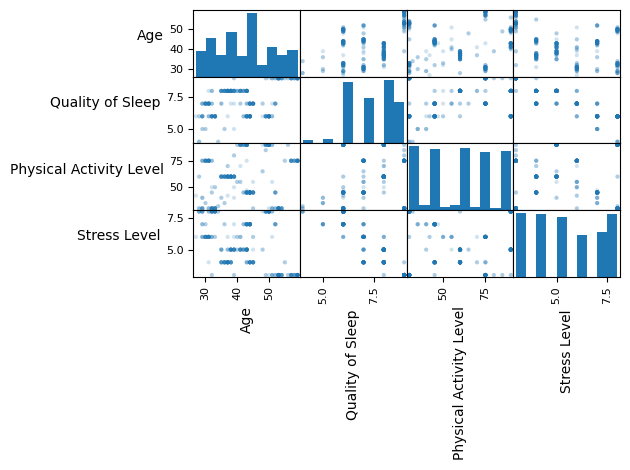

In [13]:
axes = pd.plotting.scatter_matrix(cdf, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


In [16]:
X = cdf.describe().iloc[:,[0,1]].to_numpy()
y = cdf.describe().iloc[:,[2]].to_numpy()

In [17]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [18]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,8.00,8.00
mean,0.00,0.00
std,1.07,1.07
min,-0.64,-0.42
25%,-0.42,-0.38
50%,-0.33,-0.37
75%,-0.25,-0.36
max,2.62,2.65


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [20]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train, y_train)

coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[172.12441807 -65.1952641 ]]
Intercept:  [94.72977362]


In [21]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[ 1.53588421 -0.535694  ]]
Intercept:  [-0.07941581]


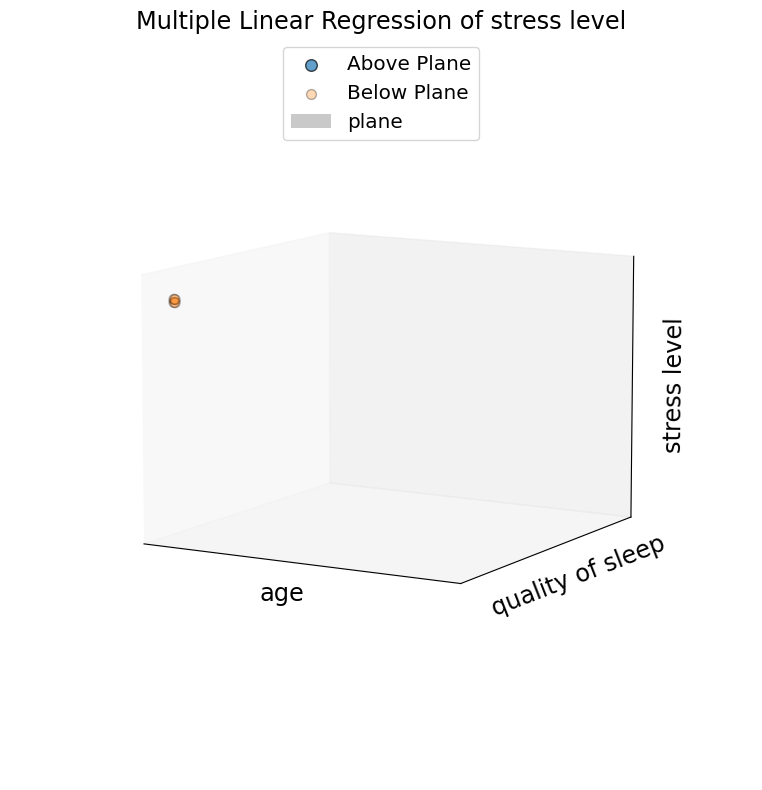

In [22]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('age', fontsize='xx-large')
ax.set_ylabel('quality of sleep', fontsize='xx-large')
ax.set_zlabel('stress level', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of stress level', fontsize='xx-large')
plt.tight_layout()
plt.show()

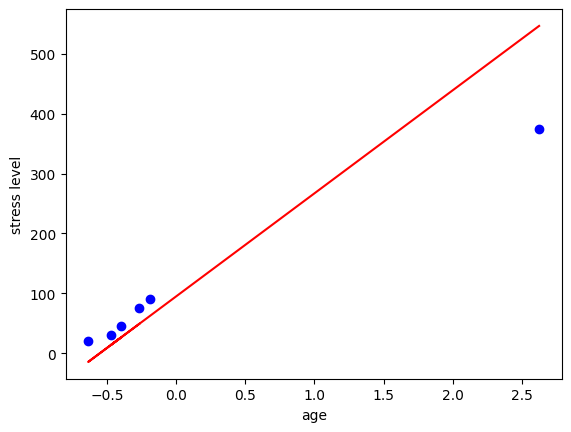

In [23]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("age")
plt.ylabel("stress level")
plt.show()